In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import math

In [2]:
x=[np.random.normal(12,21)]*10
for i in range(len(x)): x[i]=np.random.normal(12,21)
print(x)

[19.06991124681339, -9.022692296246444, -15.958467570901764, 8.758998004213957, -10.448327156886357, 34.03890541040272, 28.776136550005646, 2.1723844517084157, 21.477415772160082, 20.84706802233191]


In [2]:
class neuralNode:
    def __init__(self, w, layer, indice):
        self.w=w
        self.layer=layer
        self.indice=indice
        self.rv=0
        self.reg=0
        
        self.gradw=[0]*len(w)
    #def feedforward(self):
    #    self.expo=0
    #    for i in range(0, len(w), 1):
    #        self.expo+=self.w[i]*arr[self.layer-1][i].w

In [39]:
def sigmoid(x):
    if (x>30):
        return(1)
    elif(x<-30):
        return(0)
    return (1/(1+math.exp(-x)))

def sigmoid_diff(x):
    return (sigmoid(x)*(1-sigmoid(x)))

In [40]:
#baza neurala
liss=[1,20,30,20,1]
arr=[0]*len(liss)
arr[len(arr)-1]=[0]*liss[len(liss)-1]
for i in range(0, len(arr)-1, 1):
    arr[i]=[0]*(liss[i]+1)


#uzupełnienie neurala randomami
for i in range(0, len(liss), 1):
    for j in range(0, liss[i], 1):
        if (i>0):
            lx=[0]*liss[i-1]
            for jj in range(liss[i-1]): lx[jj]=np.random.normal(0, 1)
        else: lx=[]
        
        arr[i][j]=neuralNode(lx, i, j)
    if (i<len(liss)-1):
        arr[i][liss[i]]=neuralNode([], i, j)
        arr[i][liss[i]].rv=np.random.normal(0, 1)

In [41]:
X=[[0]]*1000
Y=[[0]]*len(X)


for i in range(0,len(X),1):
    X[i]=[random.randint(0,10000)]
    if (X[i][0]<1000 or X[i][0]>8000):
    #if (X[i][0]%2==1):
        Y[i]=[1]
    X[i]=[(X[i][0]/10000-0.5)*8]
    #print(X[2][0], X[3][0], X[4][0])
    #X[i][0]=abs(X[i][0])/(X[i][0])
    #print(X[i][0])
    #Y[i]=X[i]
print(X[2], X[3], X[4])

[2.588] [-1.6896] [-3.1616]


In [42]:
X2=[[0]]*1000
Y2=[[0]]*len(X2)

for i in range(0,len(X2),1):
    X2[i]=[random.randint(0,10000)]
    if (X2[i][0]<1000 or X2[i][0]>8000):
        Y2[i]=[1]
    X2[i]=[(X2[i][0]/10000-0.5)*8]

In [40]:
"""liss=[2,2,2]
arr=[0]*len(liss)
arr[len(arr)-1]=[0]*liss[len(liss)-1]
for i in range(0, len(arr)-1, 1):
    arr[i]=[0]*(liss[i]+1)


arr[0][0]=neuralNode([], i, j)
arr[0][1]=neuralNode([], i, j)
arr[0][2]=neuralNode([], i, j)

arr[1][0]=neuralNode([0.15, 0.2], i, j)
arr[1][1]=neuralNode([0.25, 0.3], i, j)
arr[1][2]=neuralNode([], i, j)

arr[2][0]=neuralNode([0.4, 0.45], i, j)
arr[2][1]=neuralNode([0.5, 0.55], i, j)

arr[0][2].rv=0.35
arr[1][2].rv=0.6"""

In [43]:
"""liss=[2,2,2]
arr=[0]*len(liss)
arr[len(arr)-1]=[0]*liss[len(liss)-1]
for i in range(0, len(arr)-1, 1):
    arr[i]=[0]*(liss[i]+1)


arr[0][0]=neuralNode([], i, j)
arr[0][1]=neuralNode([], i, j)
arr[0][2]=neuralNode([], i, j)

arr[1][0]=neuralNode([0.15, 0.2], i, j)
arr[1][1]=neuralNode([0.25, 0.3], i, j)
arr[1][2]=neuralNode([], i, j)

arr[2][0]=neuralNode([0.4, 0.45], i, j)
arr[2][1]=neuralNode([0.5, 0.55], i, j)

arr[0][2].rv=0.35
arr[1][2].rv=0.6
"""





#Feedforward
def feedforward(x):
    for i in range(len(x)):
        arr[0][i].rv=x[i]
    
    for i in range(1, len(liss), 1):
        for j in range(0, liss[i], 1):
            expp=arr[i-1][liss[i-1]].rv
            for ij in range(0, liss[i-1], 1):
                expp+=arr[i-1][ij].rv*arr[i][j].w[ij]
            arr[i][j].rv=sigmoid(expp)
            
    """for i in range(0, len(liss), 1):
        for j in range(0, liss[i], 1):
            print(i, j, arr[i][j].rv)"""
    """for i in range(1, len(liss), 1):
        for j in range(0, liss[i], 1):
            for ij in range(0, liss[i-1], 1):
                print(i, j, arr[i][j].w[ij])"""
    return

#Funkcja kosztu
def cost(y, ypr, ng):
    #print(y[0], ypr[0])
    summ=0
    der=[0]*len(y)
    
    #1) MSE
    #2) Kategoryczna krosentropia
    
    for i in range(0, len(y), 1):
        #summ+=(0.5*(y[i]-ypr[i])*(y[i]-ypr[i]))/ng
        #der[i]-=((y[i]-ypr[i]))/ng
        if (ypr[i]==0 or ypr[i]==1):
            if (y[i]==ypr[i]):
                summ=0
                break
            else:
                ypr[i]=abs(ypr[i]-0.00000001)
        
        summ-=(y[i]*math.log(ypr[i])+(1-y[i])*math.log(1-ypr[i]))/ng
        der[i]=-(y[i]/ypr[i]-(1-y[i])/(1-ypr[i]))
        #print(der[i])
    return (der, summ)

def backpropagation(derr):
    i=len(liss)-1
    nn=0.0001
    for j in range(0, liss[i], 1):
        arr[i][j].reg=derr[j]
    
    
    for i in range(len(liss)-1, 0, -1):
        for j in range(0, liss[i], 1):
            dgu=arr[i][j].rv
            der=arr[i][j].reg
            for ij in range(0, liss[i-1], 1):
                
                arr[i][j].gradw[ij]=der*dgu*(1-dgu)*arr[i-1][ij].rv
                arr[i-1][ij].reg+=der*dgu*(1-dgu)*arr[i][j].w[ij]
                #print('Grad1', i, j, arr[i][j].gradw[ij], arr[i][j].w[ij])
                #print('Grad2', der, dgu*(1-dgu), arr[i-1][ij].rv)
                
            arr[i-1][liss[i-1]].reg+=der*dgu*(1-dgu)*1
    
    #Update
    for i in range(len(liss)-1, 0, -1):
        for j in range(0, liss[i], 1):
            for ij in range(0, liss[i-1], 1):
                arr[i][j].w[ij]-=nn*arr[i][j].gradw[ij]
                arr[i][j].reg=0
        if (i!=len(liss)-1):
            arr[i][liss[i]].rv-=nn*arr[i][liss[i]].reg
            arr[i][liss[i]].reg=0
    arr[0][liss[0]].rv-=nn*arr[0][liss[0]].reg
    arr[0][liss[0]].reg=0
    
    """for i in range(1, len(liss), 1):
        for j in range(0, liss[i], 1):
            for ij in range(0, liss[i-1], 1):
                print(i, j, arr[i][j].w[ij])"""
    
    return

def proc(X, Y, Epochs=10, back=1):
    GG=[0]*(len(liss)-1)
    for i in range(len(liss)-1):
        GG[i]=[0]*Epochs
    
    
    
    for j in range(0,Epochs,1):#j-epoka
        res=0
        for i in range(0, len(X), 1):#i-obserwacja
            #feedforward([X[i]])
            feedforward(X[i])
            Z=[0]*liss[-1]
            for jj in range(0, liss[-1], 1):
                Z[jj]=arr[len(liss)-1][jj].rv
            
            #aa, bb=cost([Y[i]], [arr[len(arr)-1][0].rv], 1)
            aa, bb=cost(Y[i], Z, 1)
            if (back==1):
                backpropagation(aa)
            
            res+=bb
        #print(res)
        
        for ji in range(1, len(liss), 1):
            GG[ji-1][j]=[0]*(liss[ji-1]*liss[ji])
            ij=0
            for ii in range(liss[ji]):
                for jj in range(liss[ji-1]):
                    GG[ji-1][j][ij]=arr[ji][ii].w[jj]
                    ij+=1
        #plt.boxplot(x=GG)
        #plt.show()
    grid=plt.GridSpec(4, 1)
    
    """plt.figure(figsize=(19,100))
    for j in range(0, len(liss)-1, 1):
        plt.subplot(grid[j, 0])
        plt.boxplot(x=GG[j])
    plt.show()"""
    
    #return (res/len(X))
    return (arr[len(liss)-1][0].rv)



"""X=[[0.05, 0.1]]
Y=[[0.01, 0.99]]"""
#X=[[4000], [4000], [4000], [4000], [4000]]
#Y=[[0], [0], [0], [0], [0]]
#X=[[6000], [6000], [6000], [6000], [6000]]
#Y=[[1], [1], [1], [1], [1]]
E=1000
c1=[0]*E
c2=[0]*E

for j in range(0, E, 1):
    c1[j]=proc(X, Y, Epochs=1)
    c2[j]=proc(X2, Y2, Epochs=1, back=0)
    print(c1[j], c2[j])

0.3508102532145674 0.7416305166007929
0.28204909578105014 0.6770323800958076
0.24045029446544566 0.6275246787694441
0.21505405264689154 0.5917955514777778
0.19932681402127414 0.5668227123096943
0.18952612651902292 0.5497159536727133
0.18346838351316355 0.5382059143565237
0.17983497586553396 0.530634491587975
0.1778012616692217 0.5258243373219588
0.17683567847497725 0.5229486590972314
0.17658724082745358 0.5214290009170665
0.17681997483552153 0.5208609454484315
0.17737318010011763 0.5209616312491385
0.1781364824006049 0.5215330539594848
0.17903370005997118 0.5224364756498369
0.18001215848819596 0.5235745796799522
0.1810354815671425 0.5248790157742967
0.18207866092092725 0.5263016988948764
0.1831246488231421 0.5278087260506793
0.18416198643406215 0.52937612141396
0.1851831438118964 0.5309868596574956
0.18618335342102807 0.5326287835767519
0.18715978789380022 0.534293147633975
0.1881109790034241 0.5359735996525137
0.18903640620904705 0.5376654691939227
0.18993620472309955 0.53936527053949

0.29727361158760934 0.8044477591388037
0.29765374191913563 0.8053732078965755
0.29803212118583855 0.8062927885653497
0.2984087691733392 0.8072066109436639
0.2987837055821458 0.808114782723896
0.29915695002873127 0.8090174094610522
0.2995285220457536 0.8099145945489422
0.29989844108148844 0.8108064392031679
0.3002667264985212 0.8116930424503457
0.3006333975718058 0.8125745011230545
0.30099847348614184 0.8134509098599781
0.3013619733331274 0.8143223611107764
0.30172391610769667 0.8151889451452521
0.3020843207042331 0.8160507500663653
0.30244320591239937 0.8169078618267286
0.30280059041266655 0.8177603642482102
0.30315649277166523 0.8186083390442876
0.3035109314373382 0.8194518658448563
0.30386392473399165 0.8202910222231649
0.304215490857276 0.821125883724661
0.30456564786910956 0.8219565238974257
0.3049144136926265 0.8227830143240086
0.30526180610713416 0.8236054246544422
0.30560784274314745 0.8244238226402223
0.30595254107749104 0.8252382741690957
0.30629591842853027 0.8260488433004647

0.3575807334622687 0.9349046905235221
0.3577908392020073 0.9352712688293655
0.3580002426397219 0.9356358066174978
0.35820894181487434 0.935998308884213
0.3584169347906678 0.9363587807229652
0.35862421965451735 0.9367172273233363
0.3588307945185239 0.9370736539699769
0.3590366575199238 0.9374280660415163
0.3592418068215057 0.9377804690094377
0.3594462406120249 0.9381308684369333
0.3596499571065948 0.9384792699777231
0.35985295454705224 0.9388256793748524
0.3600552312023463 0.9391701024594657
0.360256785368845 0.9395125451495514
0.3604576153706718 0.9398530134486669
0.36065771956003206 0.9401915134446428
0.36085709631747553 0.940528051308263
0.36105574405218327 0.940862633291928
0.3612536612022419 0.9411952657282995
0.3614508462348714 0.9415259550289257
0.3616472976466543 0.94185470768285
0.3618430139637645 0.9421815302552101
0.3620379937421472 0.9425064293858142
0.3622322355677347 0.9428294117877105
0.3624257380565842 0.9431504842457424
0.3626184998550546 0.9434696536150892
0.3628105196

0.38572848036512847 0.978699221767582
0.3857842177053027 0.9787949894545183
0.3858393538173353 0.9788901859246906
0.38589389029819643 0.9789848152418087
0.3859478287447838 0.97907888143863
0.3860011707538764 0.9791723885171538
0.3860539179220801 0.9792653404488176
0.38610607184574813 0.979357741174687
0.38615763412095105 0.9794495946056551
0.3862086063434031 0.9795409046226364
0.38625899010841275 0.9796316750767615
0.38630878701084526 0.9797219097895749
0.38635799864505005 0.9798116125532271
0.386406626604826 0.9799007871306749
0.386454672483361 0.9799894372558732
0.3865021378731949 0.9800775666339736
0.38654902436615746 0.9801651789415182
0.38659533355334635 0.9802522778266365
0.38664106702504814 0.9803388669092404
0.38668622637071515 0.9804249497812186
0.3867308131789222 0.9805105300066339
0.3867748290373203 0.9805956111219156
0.38681827553259096 0.9806801966360554
0.38686115425040457 0.9807642900308011
0.38690346677538645 0.9808478947608501
0.38694521469107507 0.9809310142540445
0.3

0.38639467011093376 0.9907277779168522
0.3863552809428415 0.9907587557478669
0.3863155843177011 0.9907895902989587
0.38627558127519973 0.9908202823922012
0.38623527285167825 0.9908508328441419
0.38619466008008796 0.990881242465845
0.3861537439900034 0.9909115120629333
0.38611252560764414 0.9909416424356311
0.3860710059558745 0.9909716343788061
0.3860291860542076 0.9910014886820095
0.3859870669188051 0.9910312061295187
0.3859446495624744 0.9910607875003768
0.3859019349947094 0.9910902335684335
0.38585892422165413 0.9911195451023844
0.3858156182461375 0.991148722865811
0.38577201806767175 0.9911777676172204
0.38572812468243584 0.991206680110083
0.38568393908333126 0.9912354610928723
0.3856394622599293 0.9912641113091016
0.3855946951985298 0.9912926314973636
0.3855496388821344 0.9913210223913663
0.3855042942904632 0.9913492847199713
0.38545866239996485 0.9913774192072298
0.3854127441838033 0.99140542657242
0.38536654061190295 0.9914333075300825
0.38532005265092417 0.9914610627900569
0.385

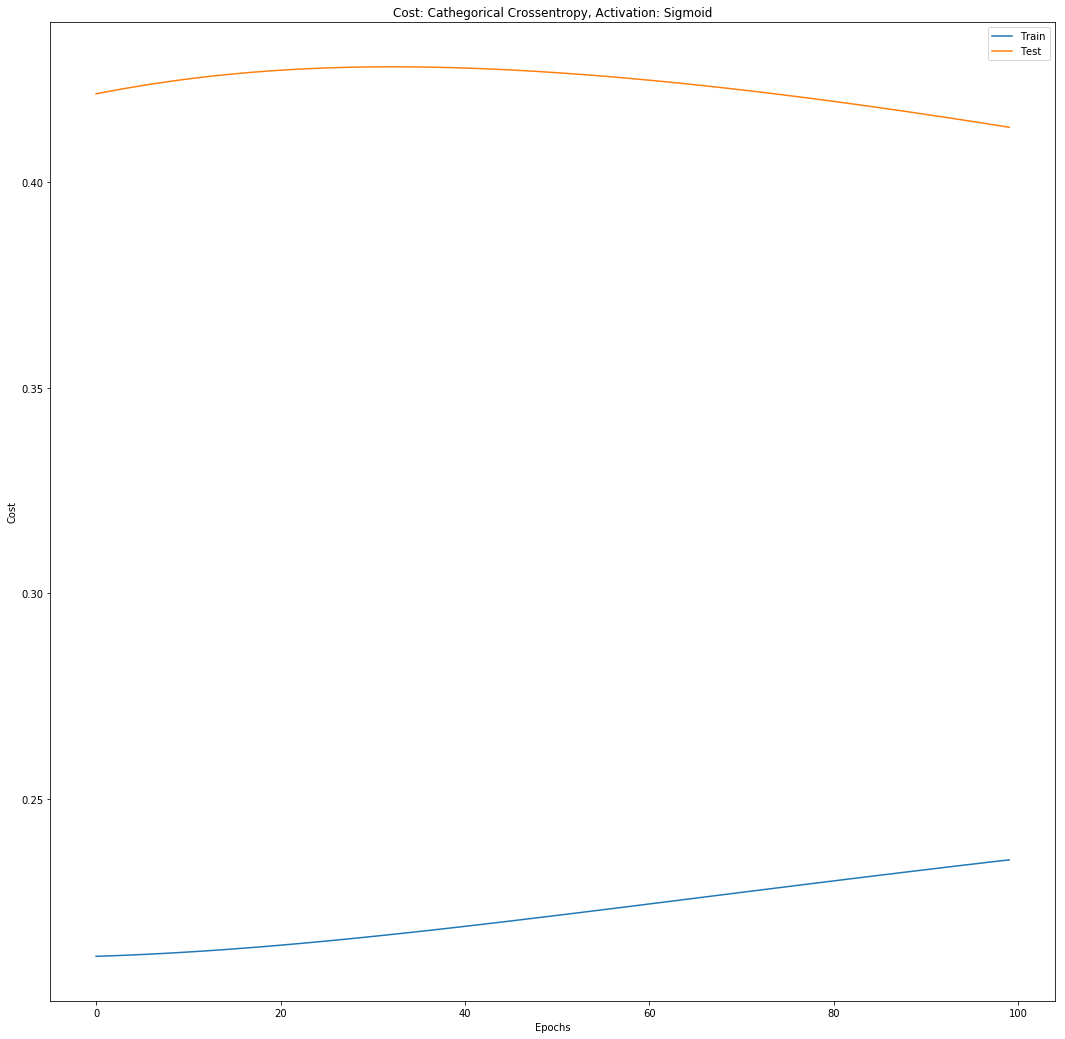

In [32]:
plt.figure(figsize=(18,18))
plt.title('Cost: Cathegorical Crossentropy, Activation: Sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(range(0, E, 1), c1, label='Train')
plt.plot(range(0, E, 1), c2, label='Test')
plt.legend(loc=1)

plt.show()

In [44]:
alles=10000
yy=[0]*alles
cos=[0]*alles

for i in range(0, alles, 1):
    if (i<1000 or i>8000):
        yy[i]=1
    cos[i]=proc([[((i/10000)-0.5)*8]], [[yy[i]]], Epochs=1, back=0)
    #plt.scatter(i, cos)
    #plt.scatter(i, yy)
#plt.show()


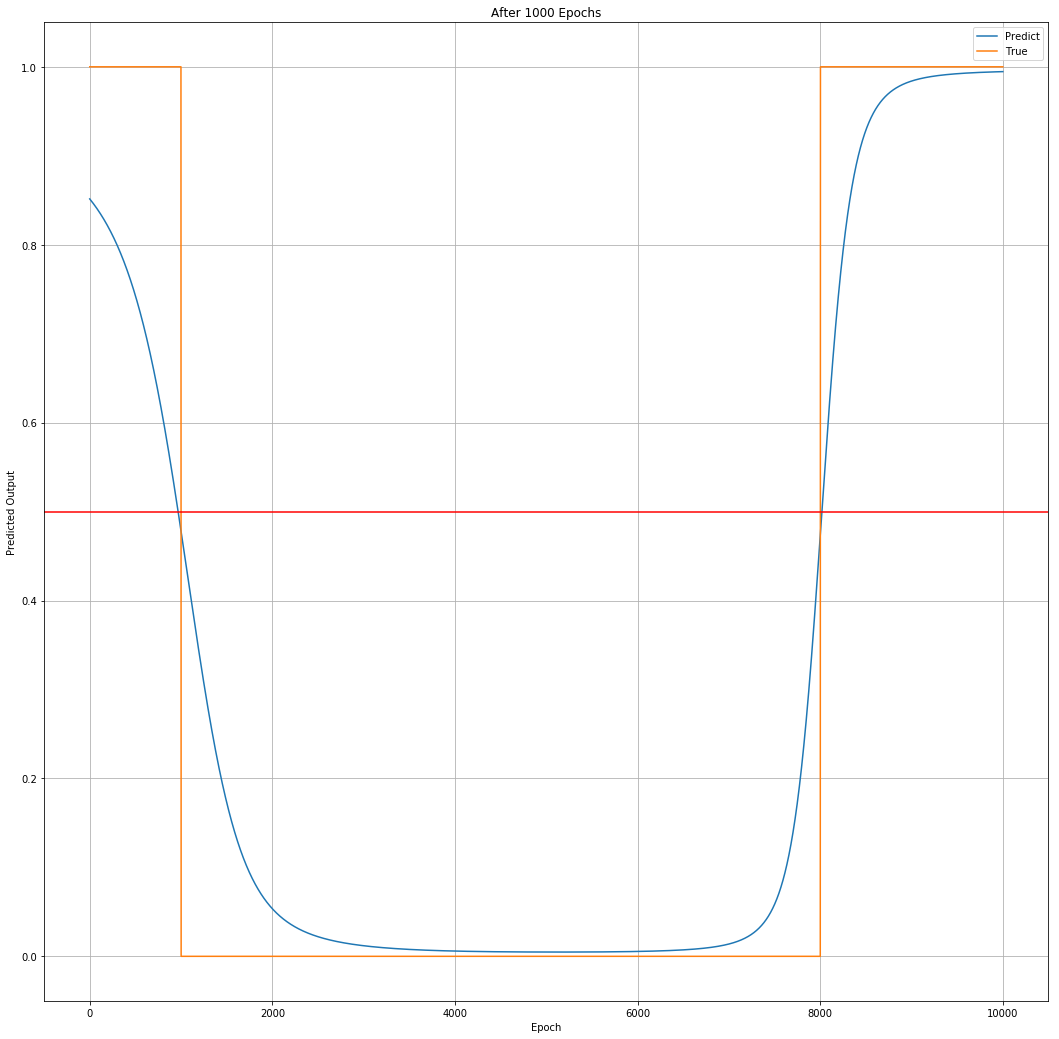

In [50]:
plt.figure(figsize=(18,18))
plt.plot(range(0, alles, 1), cos, label='Predict')
plt.plot(range(0, alles, 1), yy, label='True')
plt.legend(loc=1)
plt.title('After '+str(E)+' Epochs')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Predicted Output')
plt.grid()

plt.show()

In [44]:
liss=[2,2,2]
arr=[0]*len(liss)
arr[len(arr)-1]=[0]*liss[len(liss)-1]
for i in range(0, len(arr)-1, 1):
    arr[i]=[0]*(liss[i]+1)


arr[0][0]=neuralNode([], i, j)
arr[0][1]=neuralNode([], i, j)
arr[0][2]=neuralNode([], i, j)

arr[1][0]=neuralNode([0.15, 0.2], i, j)
arr[1][1]=neuralNode([0.25, 0.3], i, j)
arr[1][2]=neuralNode([], i, j)

arr[2][0]=neuralNode([0.4, 0.45], i, j)
arr[2][1]=neuralNode([0.5, 0.55], i, j)

arr[0][2].rv=0.35
arr[1][2].rv=0.6






#Feedforward
def feedforward(x):
    for i in range(len(x)):
        arr[0][i].rv=x[i]
    
    for i in range(1, len(liss), 1):
        for j in range(0, liss[i], 1):
            expp=arr[i-1][liss[i-1]].rv
            for ij in range(0, liss[i-1], 1):
                expp+=arr[i-1][ij].rv*arr[i][j].w[ij]
            arr[i][j].rv=sigmoid(expp)
            
    """for i in range(1, len(liss), 1):
        for j in range(0, liss[i], 1):
            print(i, j, arr[i][j].rv)"""
    return

#Funkcja kosztu
def cost(y, ypr, ng):
    summ=0
    der=[0]*len(y)
    #print(ypr)
    for i in range(0, len(y), 1):
        summ+=(0.5*(y[i]-ypr[i])*(y[i]-ypr[i]))/ng
        der[i]-=((y[i]-ypr[i]))/ng
    return (der, summ)

def backpropagation(derr):
    i=len(liss)-1
    nn=0.5
    for j in range(0, liss[i], 1):
        arr[i][j].reg=derr[j]
    
    
    for i in range(len(liss)-1, 0, -1):
        for j in range(0, liss[i], 1):
            for ij in range(0, liss[i-1], 1):
                dgu=arr[i][j].rv
                der=arr[i][j].reg
                
                arr[i][j].gradw[ij]=der*dgu*(1-dgu)*arr[i-1][ij].rv
                arr[i-1][ij].reg+=der*dgu*(1-dgu)*arr[i][j].w[ij]
                #print('Grad1', i, j, arr[i][j].gradw[ij], arr[i][j].w[ij])
                #print('Grad2', der, dgu*(1-dgu), arr[i-1][ij].rv)
                
            arr[i-1][liss[i-1]].reg+=(1/liss[i])*der*dgu*(1-dgu)*1
    
    #Update
    for i in range(len(liss)-1, 0, -1):
        for j in range(0, liss[i], 1):
            for ij in range(0, liss[i-1], 1):
                arr[i][j].w[ij]-=nn*arr[i][j].gradw[ij]
                arr[i][j].reg=0
        """if (i!=len(liss)-1):
            arr[i][liss[i]].rv-=nn*arr[i][liss[i]].reg
            arr[i][liss[i]].reg=0
    arr[0][liss[0]].rv-=nn*arr[0][liss[0]].reg
    arr[0][liss[0]].reg=0
    
    for i in range(1, len(liss), 1):
        for j in range(0, liss[i], 1):
            for ij in range(0, liss[i-1], 1):
                print(i, j, arr[i][j].w[ij])"""
    
    return

def proc(X, Y):
    for j in range(0,10000,1):#j-epoka
        res=0
        for i in range(0, len(X), 1):#i-obserwacja
            #feedforward([X[i]])
            feedforward(X[i])
            Z=[0]*liss[-1]
            for j in range(0, liss[-1], 1):
                Z[j]=arr[len(liss)-1][j].rv
            
            #aa, bb=cost([Y[i]], [arr[len(arr)-1][0].rv], 1)
            aa, bb=cost(Y[i], Z, 1)
            backpropagation(aa)
            
            res+=bb
        print(res)
    return

X=[[0.05, 0.1]]
Y=[[0.01, 0.99]]
proc(X, Y)

0.2983711087600027
0.29102777369359933
0.28354713312241997
0.27594328888945185
0.2682327611533904
0.2604343927553956
0.2525691759825399
0.24465999920966014
0.23673131551750956
0.2288087405423599
0.22091859205390404
0.21308738853919237
0.20534132782860484
0.19770576904507683
0.19020474155711192
0.18286050305977403
0.17569316553702105
0.1687204030478535
0.16195724957465663
0.15541598920395305
0.14910613528945255
0.14303449048182013
0.13720527594166854
0.13162031583665817
0.12627926233790177
0.12117984661240595
0.11631814250431402
0.11168883141750102
0.1072854590712214
0.10310067705252127
0.09912646424290343
0.09535432512163747
0.09177546356987579
0.08838093209082147
0.08516175732884734
0.08210904344489682
0.07921405532961884
0.07646828385714464
0.0738634954479428
0.07139176816113446
0.06904551641113447
0.06681750622982835
0.06470086279642512
0.06268907174949168
0.060775975591331716
0.05895576630166304
0.05722297510020438
0.05557246013871597
0.05399939276300248
0.052499242864015555
0.0510

0.000582181808774652
0.0005817059436239544
0.0005812307279557853
0.0005807561604996224
0.0005802822399882063
0.0005798089651575246
0.0005793363347467871
0.0005788643474984165
0.0005783930021580522
0.000577922297474537
0.0005774522321998928
0.000576982805089329
0.000576514014901217
0.0005760458603970952
0.0005755783403416422
0.0005751114535026886
0.0005746451986511806
0.0005741795745611861
0.0005737145800098964
0.0005732502137775844
0.0005727864746476209
0.0005723233614064638
0.0005718608728436355
0.0005713990077517207
0.0005709377649263507
0.0005704771431662065
0.0005700171412730034
0.0005695577580514656
0.0005690989923093598
0.0005686408428574187
0.0005681833085093996
0.0005677263880820402
0.0005672700803950391
0.0005668143842710821
0.0005663592985358065
0.0005659048220177914
0.0005654509535485636
0.0005649976919625722
0.0005645450360972028
0.0005640929847927313
0.0005636415368923575
0.0005631906912421656
0.0005627404466911236
0.000562290802091086
0.0005618417562967641
0.0005613933081

0.00023541025843887493
0.00023530108633959041
0.00023519199415528603
0.0002350829818034504
0.00023497404920168455
0.00023486519626770818
0.00023475642291934307
0.00023464772907452484
0.0002345391146512989
0.0002344305795678205
0.00023432212374235493
0.00023421374709327363
0.00023410544953906217
0.00023399723099831268
0.00023388909138972953
0.00023378103063211915
0.00023367304864440385
0.00023356514534560846
0.00023345732065487365
0.00023334957449144106
0.00023324190677466002
0.00023313431742399697
0.00023302680635901128
0.0002329193734993824
0.0002328120187648928
0.00023270474207542723
0.000232597543350984
0.000232490422511667
0.0002323833794776848
0.0002322764141693491
0.00023216952650708593
0.0002320627164114202
0.00023195598380298618
0.00023184932860252175
0.00023174275073087444
0.0002316362501089904
0.00023152982665792312
0.00023142348029883764
0.00023131721095299334
0.00023121101854176368
0.00023110490298662096
0.0002309988642091399
0.00023089290213100421
0.00023078701667399935
0.

0.00012614439382462703
0.0001261027174269358
0.00012606106178570474
0.0001260194268865817
0.0001259778127152351
0.00012593621925734063
0.00012589464649859032
0.00012585309442468516
0.00012581156302134632
0.00012577005227429837
0.00012572856216928364
0.00012568709269205727
0.00012564564382838773
0.00012560421556405497
0.00012556280788484758
0.00012552142077657425
0.00012548005422505253
0.00012543870821611164
0.00012539738273559687
0.00012535607776936291
0.00012531479330327568
0.00012527352932321933
0.0001252322858150875
0.00012519106276478407
0.00012514986015823014
0.0001251086779813543
0.00012506751622010337
0.00012502637486043087
0.0001249852538883082
0.00012494415328971354
0.00012490307305064062
0.00012486201315709824
0.00012482097359510478
0.00012477995435068755
0.00012473895540989432
0.0001246979767587784
0.00012465701838341038
0.00012461608026986581
0.00012457516240424243
0.00012453426477264493
0.000124493387361188
0.00012445253015600497
0.00012441169314323546
0.000124370876309037

7.307237164190698e-05
7.305374948180524e-05
7.30351341708636e-05
7.301652570564618e-05
7.299792408272296e-05
7.297932929865962e-05
7.296074135003107e-05
7.294216023341003e-05
7.292358594537088e-05
7.290501848249588e-05
7.28864578413632e-05
7.286790401855604e-05
7.284935701065996e-05
7.283081681426017e-05
7.28122834259467e-05
7.279375684231262e-05
7.277523705994964e-05
7.275672407545546e-05
7.273821788542688e-05
7.271971848646529e-05
7.270122587517195e-05
7.268274004815158e-05
7.266426100201192e-05
7.264578873336113e-05
7.262732323881212e-05
7.260886451497664e-05
7.259041255847028e-05
7.257196736591102e-05
7.25535289339175e-05
7.25350972591154e-05
7.25166723381251e-05
7.249825416757504e-05
7.247984274409426e-05
7.246143806431083e-05
7.244304012485897e-05
7.242464892237521e-05
7.240626445349592e-05
7.238788671485853e-05
7.23695157031063e-05
7.235115141488401e-05
7.233279384683653e-05
7.231444299560815e-05
7.229609885785586e-05
7.227776143022631e-05
7.225943070937808e-05
7.224110669196382

4.7478792349777426e-05
4.746868835895087e-05
4.7458587363266015e-05
4.7448489361529486e-05
4.743839435254998e-05
4.742830233514082e-05
4.741821330811077e-05
4.740812727027177e-05
4.739804422043727e-05
4.7387964157416515e-05
4.737788708002626e-05
4.736781298707895e-05
4.73577418773893e-05
4.734767374977275e-05
4.73376086030437e-05
4.7327546436021685e-05
4.7317487247518714e-05
4.7307431036356096e-05
4.7297377801351115e-05
4.728732754132095e-05
4.727728025508692e-05
4.7267235941466634e-05
4.7257194599283964e-05
4.7247156227357064e-05
4.723712082450863e-05
4.722708838956112e-05
4.7217058921337135e-05
4.7207032418660215e-05
4.71970088803538e-05
4.718698830524402e-05
4.7176970692155226e-05
4.7166956039913755e-05
4.7156944347344145e-05
4.714693561327686e-05
4.713692983653648e-05
4.712692701595267e-05
4.7116927150352885e-05
4.7106930238569354e-05
4.709693627942999e-05
4.708694527176507e-05
4.707695721440707e-05
4.7066972106187417e-05
4.705698994593773e-05
4.704701073249106e-05
4.70370344646828

In [70]:
#Backpropagation
i=len(liss)-1
for j in range(0, liss[i], 1):
    for ij in range(0, liss[i-1], 1):
        

for i in range(len(liss)-1, 0, -1):
    for j in range(0, liss[i], 1):
        
        

IndentationError: expected an indented block (<ipython-input-70-2d6145c7b6ed>, line 7)

In [83]:
t1=time.time()
lis=[0]*100
for i in range(len(lis)):
    lis[i]=[0]*10000
for i in range(len(lis)):
    for j in range(len(lis[i])):
        lis[i][j]=i+j
        x=lis[i][j]

print(lis[13][1043])
t2=time.time()
print(t2-t1)


1056
0.28080058097839355
